### P Sai Deekshith (1BM18CS148)

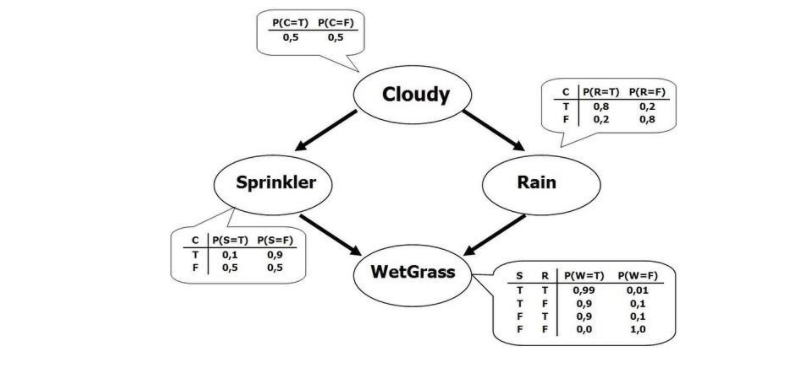

In [30]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination


In [31]:
model = BayesianModel([('Cloudy', 'Sprinkler'),
                       ('Sprinkler', 'WetGrass'),
                       ('Cloudy', 'Rain'),
                       ('Rain', 'WetGrass')])

In [32]:
print('Bayesian network nodes are :')
print("\t", model.nodes())
print()
print('Bayesian network edges are: ')
print("\t", model.edges())

Bayesian network nodes are :
	 ['Cloudy', 'Sprinkler', 'WetGrass', 'Rain']

Bayesian network edges are: 
	 [('Cloudy', 'Sprinkler'), ('Cloudy', 'Rain'), ('Sprinkler', 'WetGrass'), ('Rain', 'WetGrass')]


In [33]:
cpd_cloudy = TabularCPD(variable='Cloudy',variable_card=2,values=[[0.5],[0.5]])


In [34]:
cpd_sprinkler = TabularCPD(variable='Sprinkler',variable_card=2,values=[[0.5,0.9],[0.5,0.1]],evidence=['Cloudy'],evidence_card=[2])


In [35]:
cpd_rain = TabularCPD(variable='Rain',variable_card=2,values=[[0.8,0.2],[0.2,0.8]],evidence=['Cloudy'],evidence_card=[2])


In [39]:
cpd_wetgrass = TabularCPD(variable='WetGrass',variable_card=2,values=[[1.0, 0.1, 0.1, 0.01],[0.0, 0.9, 0.9, 0.99]],evidence=['Sprinkler','Rain'],evidence_card=[2,2])

In [40]:
model.add_cpds(cpd_cloudy,cpd_sprinkler,cpd_rain,cpd_wetgrass)
print('Model generated by adding cpts(cpds)')
print('Checking correctness of model:',end=' ')
print(model.check_model())

Model generated by adding cpts(cpds)
Checking correctness of model: True


In [41]:
print('Displaying  CPDs')
print()
print(model.get_cpds('Cloudy'))
print()
print(model.get_cpds('Sprinkler'))
print()
print(model.get_cpds('Rain'))
print()
print(model.get_cpds('WetGrass'))
print()


Displaying  CPDs

+-----------+-----+
| Cloudy(0) | 0.5 |
+-----------+-----+
| Cloudy(1) | 0.5 |
+-----------+-----+

+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+

+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+

+-------------+--------------+--------------+--------------+--------------+
| Sprinkler   | Sprinkler(0) | Sprinkler(0) | Sprinkler(1) | Sprinkler(1) |
+-------------+--------------+--------------+--------------+--------------+
| Rain        | Rain(0)      | Rain(1)      | Rain(0)      | Rain(1)      |
+-------------+--------------+------

In [42]:
infer=VariableElimination(model)

#### P(Sprinkler, WetGrass | Cloudy):


In [43]:
print('\nInferencing with bayesian network')
print("\n\nProbability of sprinkler and wetgrass given cloudy")
q=infer.query(variables=['Sprinkler','WetGrass'],evidence={'Cloudy':1})
print(q)

Eliminating: Rain: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.28it/s]


Inferencing with bayesian network


Probability of sprinkler and wetgrass given cloudy
+-------------+--------------+---------------------------+
| WetGrass    | Sprinkler    |   phi(WetGrass,Sprinkler) |
+=============+==============+===========================+
| WetGrass(0) | Sprinkler(0) |                    0.2520 |
+-------------+--------------+---------------------------+
| WetGrass(0) | Sprinkler(1) |                    0.0028 |
+-------------+--------------+---------------------------+
| WetGrass(1) | Sprinkler(0) |                    0.6480 |
+-------------+--------------+---------------------------+
| WetGrass(1) | Sprinkler(1) |                    0.0972 |
+-------------+--------------+---------------------------+
